# Import

In [33]:
import numpy as np
import matplotlib.pyplot as plt

# Run

In [34]:
result = !python main.py @config/defaults.txt

# Parse output

In [35]:
result = result[1:]

iter_result = result[:-1]
final_result = result[-1]

N = int(final_result.split(',')[17])

iter_result = [l.split('   ') for l in iter_result]

neighbor_fitness = np.array([float(l[3]) for l in iter_result])
current_fitness = np.array([float(l[4]) for l in iter_result])
best_fitness = np.array([float(l[5]) for l in iter_result])
temp = np.array([float(l[6]) for l in iter_result])

# Compute probability over time

In [36]:
prob = np.exp((neighbor_fitness - current_fitness) / temp)
prob = np.where(prob >= 1, 0, prob)

In [65]:
print(neighbor_fitness.size)
print(current_fitness.size)

23025
23025


In [49]:
import pandas as pd

In [66]:
pd.DataFrame(np.array([(neighbor_fitness - current_fitness)[1620:1630], temp[1620:1630], ((neighbor_fitness - current_fitness) / temp)[1620:1630], prob[1620:1630]]).transpose())

,0,1,2,3
0,0.000,0.00085,0.000000,0.000000e+00
1,-0.009,0.00085,-10.583886,2.532075e-05
2,-0.049,0.00085,-57.629144,9.375207e-26
3,0.000,0.00085,0.000000,0.000000e+00
4,-0.001,0.00085,-1.176340,3.084054e-01
5,0.000,0.00085,0.000000,0.000000e+00
6,-0.033,0.00085,-38.826993,1.372939e-17
7,0.004,0.00085,4.706773,0.000000e+00
8,0.000,0.00085,0.000000,0.000000e+00
9,0.000,0.00085,0.000000,0.000000e+00


# Plot

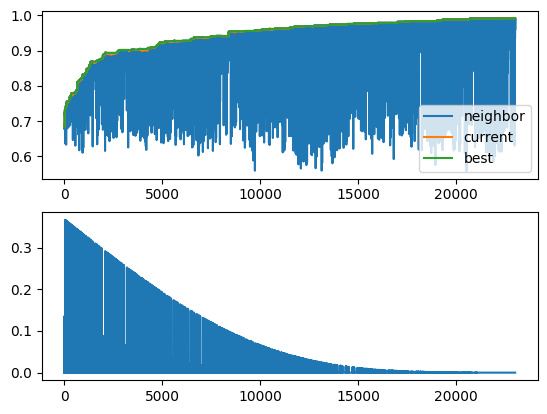

In [70]:
window = range(0,len(neighbor_fitness))
# window = range(40000,len(neighbor_fitness))
# window = range(1600,1700)

ax1 = plt.subplot(211)
ax1.plot(neighbor_fitness[window], label="neighbor")
ax1.plot(current_fitness[window], label="current")
ax1.plot(best_fitness[window], label="best")
ax1.legend()

ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(prob[window])

# ax2 = plt.subplot(313, sharex=ax1)
# ax2.plot((neighbor_fitness - current_fitness)[window])

In [38]:
result[-1]

'123.86391083800001,0.992,0.98164,0.9632064128256512,0,2968811710,3677149159,745650761,2884920346,2642120001,2590541744,117660781,500,500,15,4,4,1000,SA,SRMP,None,None,None,None,None,0.001,0.9999,1,0.0001,None,None,None,0,None,None,None,None,None'